In [1]:
# This is used to increase the notebook's width to fill the screen, allowing for better plot visualization
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

import os
import cv2
import time
import shutil
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()

from utils import plot
from utils import split

C:\Users\leoar\AppData\Local\Temp\ipykernel_22432\659568940.py:2: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


# The Lung Image Database Consortium image collection (LIDC-IDRI) Dataset

The Lung Image Database Consortium image collection (LIDC-IDRI) consists of diagnostic and lung cancer screening thoracic computed tomography (CT) scans with marked-up annotated lesions. It is a web-accessible international resource for development, training, and evaluation of computer-assisted diagnostic (CAD) methods for lung cancer detection and diagnosis. Initiated by the National Cancer Institute (NCI), further advanced by the Foundation for the National Institutes of Health (FNIH), and accompanied by the Food and Drug Administration (FDA) through active participation, this public-private partnership demonstrates the success of a consortium founded on a consensus-based process.

Seven academic centers and eight medical imaging companies collaborated to create this data set which contains 1018 cases.  Each subject includes images from a clinical thoracic CT scan and an associated XML file that records the results of a two-phase image annotation process performed by four experienced thoracic radiologists. In the initial blinded-read phase, each radiologist independently reviewed each CT scan and marked lesions belonging to one of three categories ("nodule > or =3 mm," "nodule <3 mm," and "non-nodule > or =3 mm"). In the subsequent unblinded-read phase, each radiologist independently reviewed their own marks along with the anonymized marks of the three other radiologists to render a final opinion. The goal of this process was to identify as completely as possible all lung nodules in each CT scan without requiring forced consensus.

Note : The TCIA team strongly encourages users to review pylidc and the DICOM representation of the annotations/segmentations included in this dataset before developing custom tools to analyze the XML version. 

## [Source]()

# Path to Dataset

In [2]:
# Relative path to dataset
data_dir = os.path.join( "C:\\Datasets\\COVID19\\Tomografia\\COVIDx CT-3A" )
assert os.path.exists( data_dir ), "Unable to find the relative path to COVIDx CT-3A, please check data_dir..."

#
dataset_name = "LIDC-IDRI"

## Samples Dataframe

In [3]:
# Path to metadata csv
csv_path = os.path.join( data_dir, "combined_metadata.csv" )

# Reads metadata as dataframe, "age" column is treated as str since "N/A" can't be int
samples_df = pd.read_csv(csv_path, sep = ";", na_filter = False, dtype={"age": str})

samples_df.head()

,filename,patient_id,source,class,country,sex,age,partition,slice_selection,x_min,y_min,x_max,y_max,verified_finding,view,modality
0,NCP_96_1328_0032.png,NCP_96,CNCB,COVID-19,China,M,74.0,train,Expert,9,94,512,405,Yes,Axial,CT
1,NCP_96_1328_0035.png,NCP_96,CNCB,COVID-19,China,M,74.0,train,Expert,10,106,512,405,Yes,Axial,CT
2,NCP_96_1328_0036.png,NCP_96,CNCB,COVID-19,China,M,74.0,train,Expert,10,105,512,406,Yes,Axial,CT
3,NCP_96_1328_0037.png,NCP_96,CNCB,COVID-19,China,M,74.0,train,Expert,11,104,512,406,Yes,Axial,CT
4,NCP_96_1328_0038.png,NCP_96,CNCB,COVID-19,China,M,74.0,train,Expert,11,103,512,406,Yes,Axial,CT


## Patients Dataframe

In [4]:
# Creates a new dataframe with metadata sorted by patient
patient_df = plot.convert_df_sample2patient( samples_df )

patient_df.head()

,patient_id,source,class,country,sex,age,partition,slice_selection,verified_finding,view,modality,sample_count
0,NCP_96,CNCB,COVID-19,China,M,74.0,train,Expert,Yes,Axial,CT,121
1,NCP_270,CNCB,COVID-19,China,N/A,N/A,train,Expert,Yes,Axial,CT,124
2,NCP_322,CNCB,COVID-19,China,N/A,N/A,train,Expert,Yes,Axial,CT,40
3,NCP_1276,CNCB,COVID-19,China,N/A,N/A,train,Expert,Yes,Axial,CT,32
4,NCP_2683,CNCB,COVID-19,China,N/A,N/A,train,Expert,Yes,Axial,CT,9


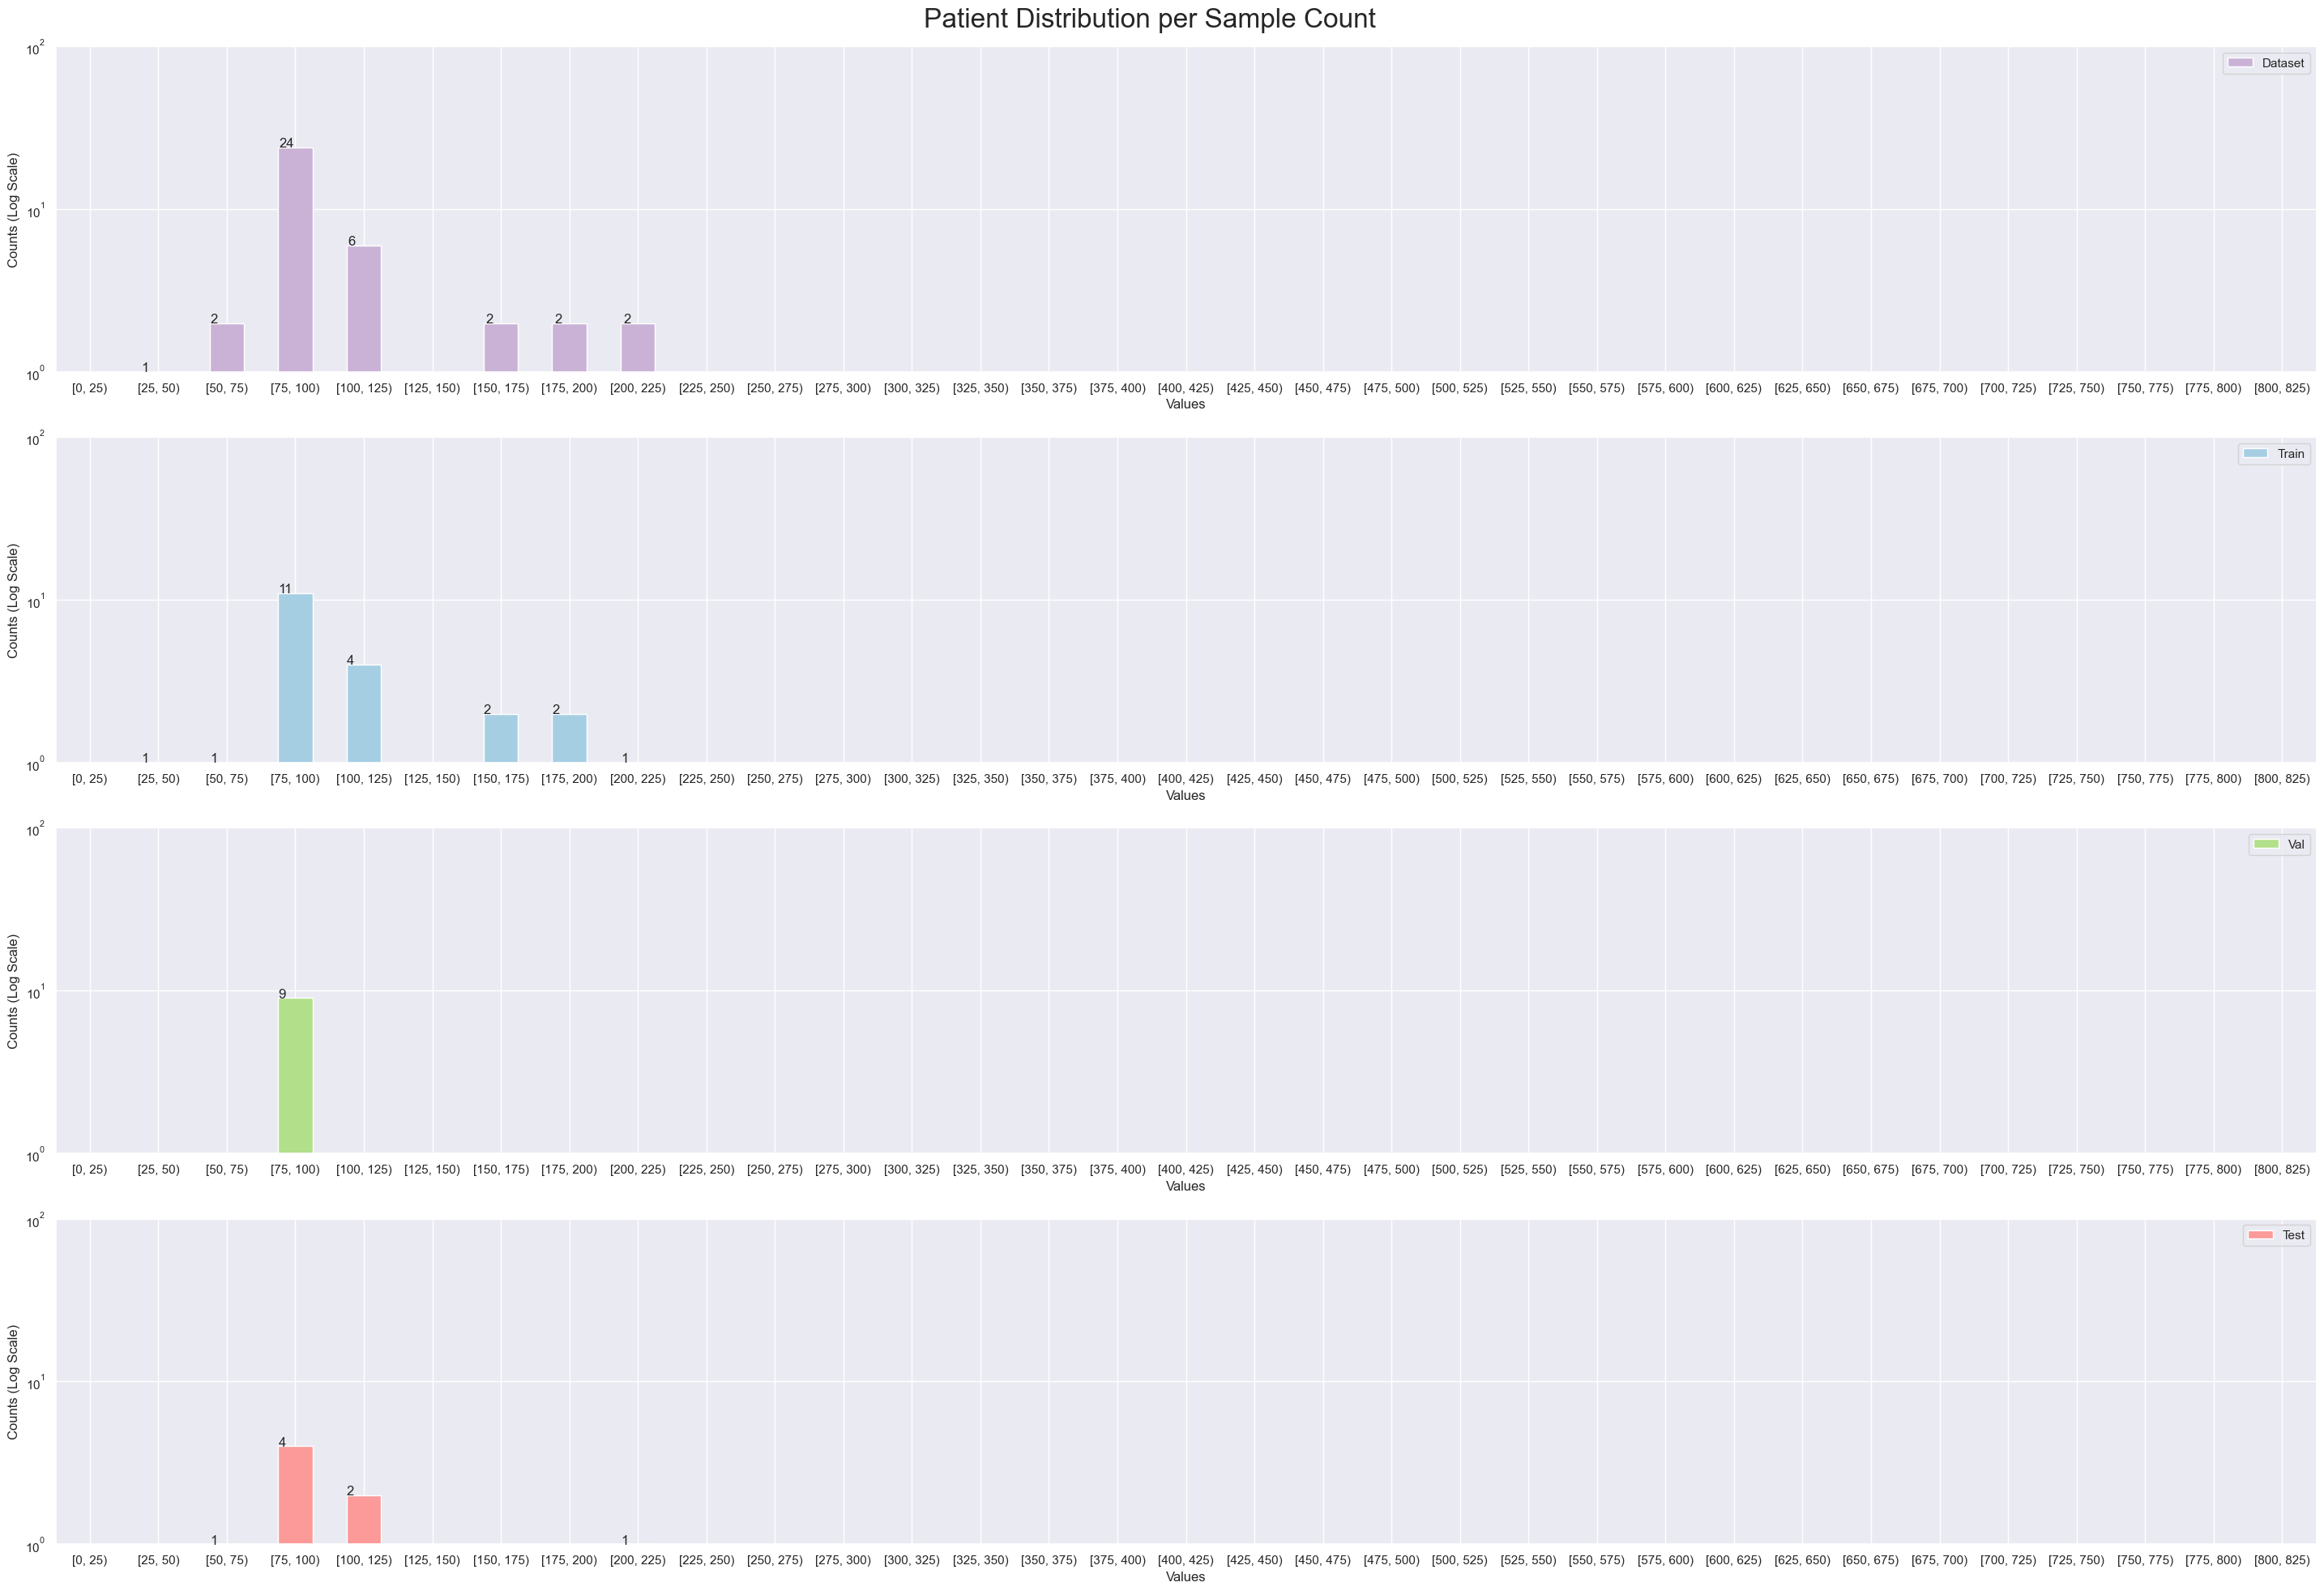

In [5]:
figure = plt.figure( figsize = (36, 24) )
plot.column_per_partition_as_histogram( patient_df, "sample_count", dataset_name, figure, title_complement = "Patient")

In [6]:
counts_df = plot.column_bins_per_partition_as_df( patient_df, "sample_count", dataset_name )
counts_df.head(len(counts_df))

,Dataset,Train,Val,Test
Values,,,,
"[0, 25)",0,0,0,0
"[25, 50)",1,1,0,0
"[50, 75)",2,1,0,1
"[75, 100)",24,11,9,4
"[100, 125)",6,4,0,2
"[125, 150)",0,0,0,0
"[150, 175)",2,2,0,0
"[175, 200)",2,2,0,0
"[200, 225)",2,1,0,1


# Plots

## Class

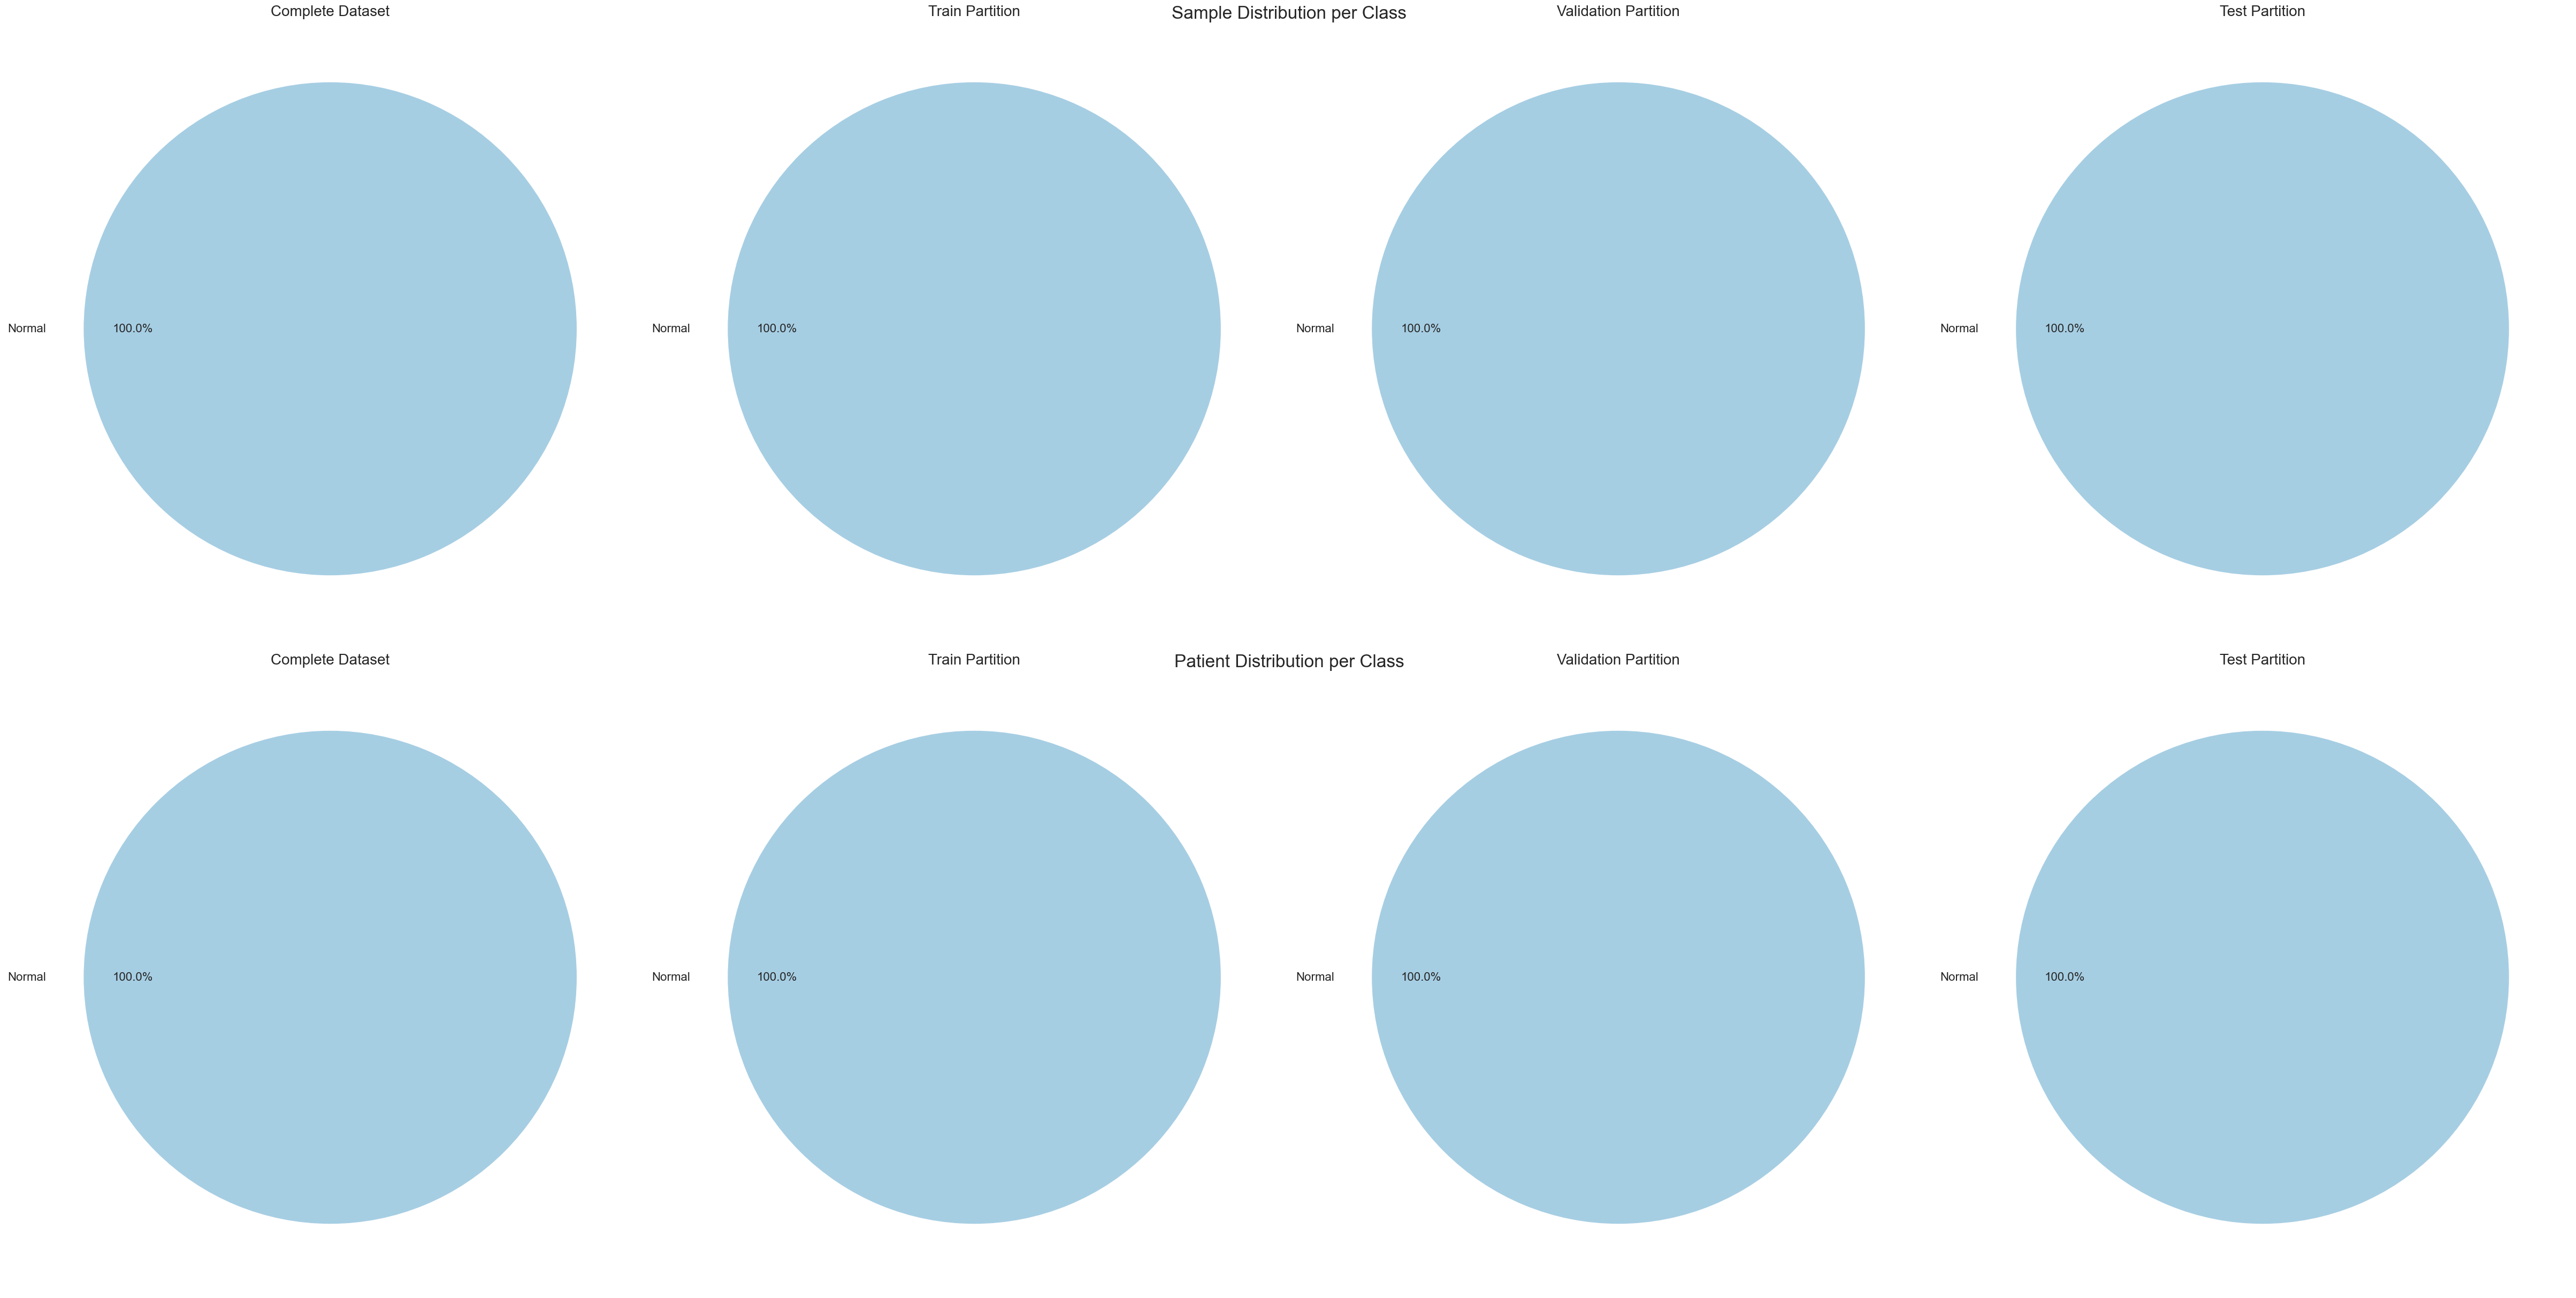

In [7]:
plot.column_as_pies( samples_df, patient_df, "class", dataset_name, figsize = (48, 24) )

In [8]:
plot.column_as_table( samples_df, patient_df, "class", dataset_name, bin_flag = False )

,Dataset,Train,Val,Test
Values,,,,
COVID-19,0,0,0,0
Normal,3999,2380,778,841
Pneumonia,0,0,0,0
SUM,3999,2380,778,841
,Dataset,Train,Val,Test
Values,,,,
COVID-19,0,0,0,0
Pneumonia,0,0,0,0
Normal,39,22,9,8


## Age

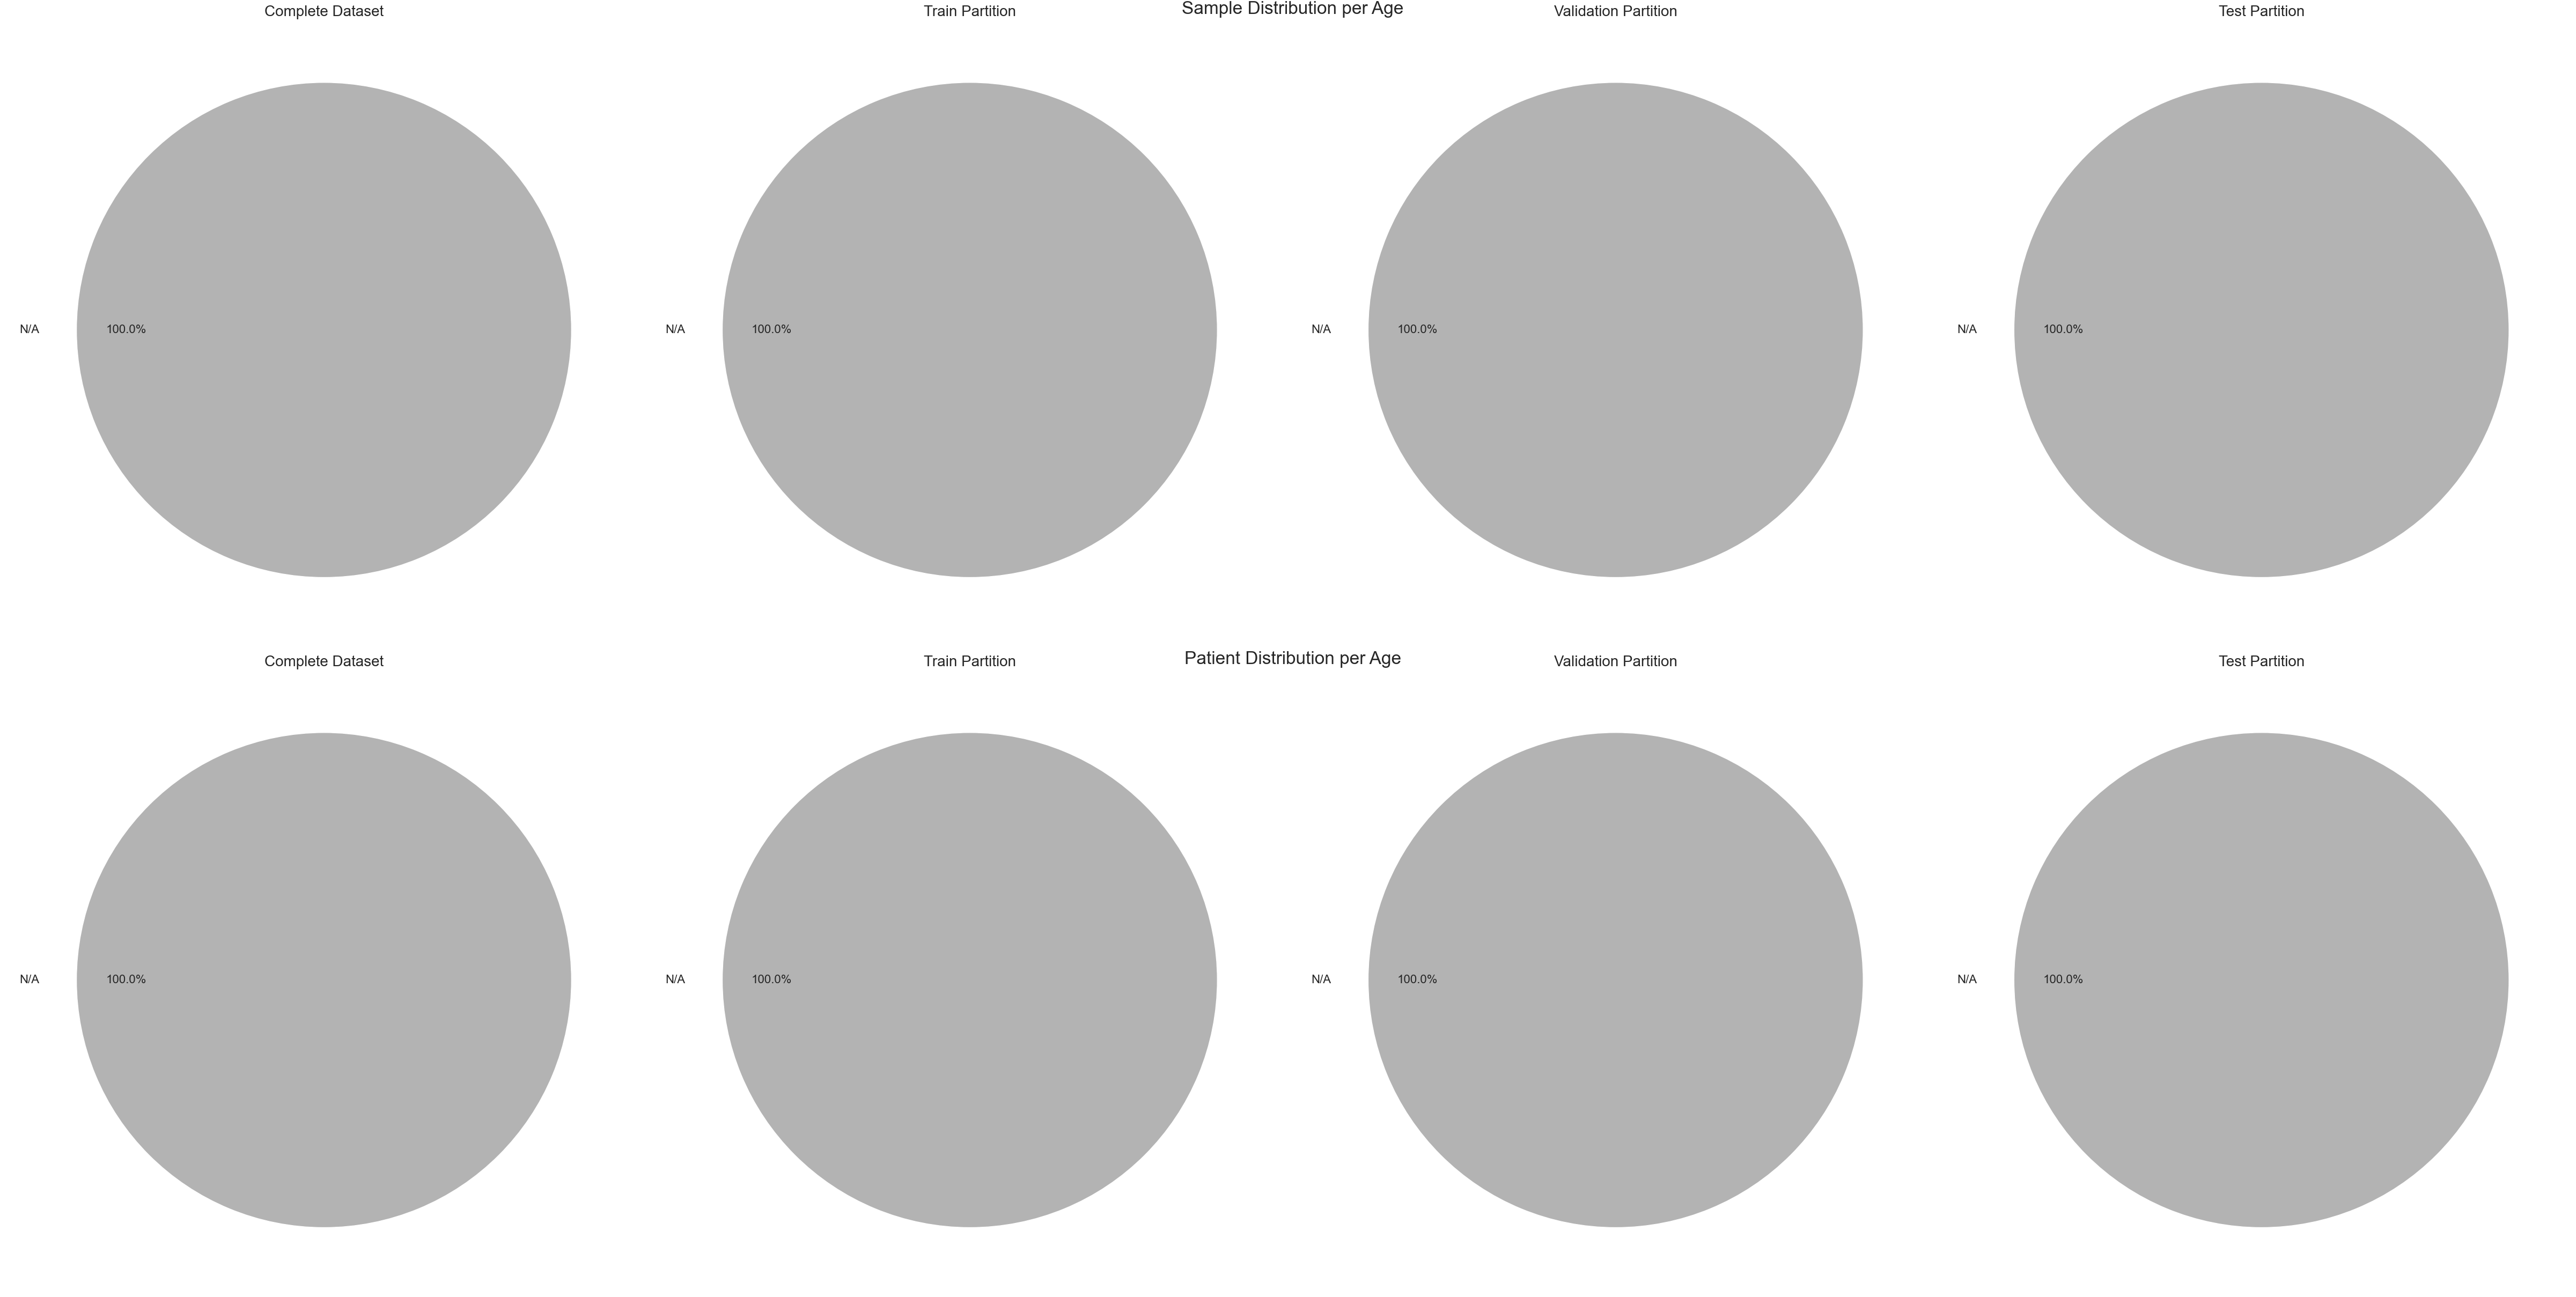

In [9]:
plot.column_as_pies( samples_df, patient_df, "age", dataset_name, figsize = (48, 24))

In [10]:
plot.column_as_table( samples_df, patient_df, "age", dataset_name, bin_flag = False )

,Dataset,Train,Val,Test
Values,,,,
N/A,3999,2380,778,841
Known Ages,0,0,0,0
SUM,3999,2380,778,841
,Dataset,Train,Val,Test
Values,,,,
N/A,39,22,9,8
Known Ages,0,0,0,0
SUM,39,22,9,8


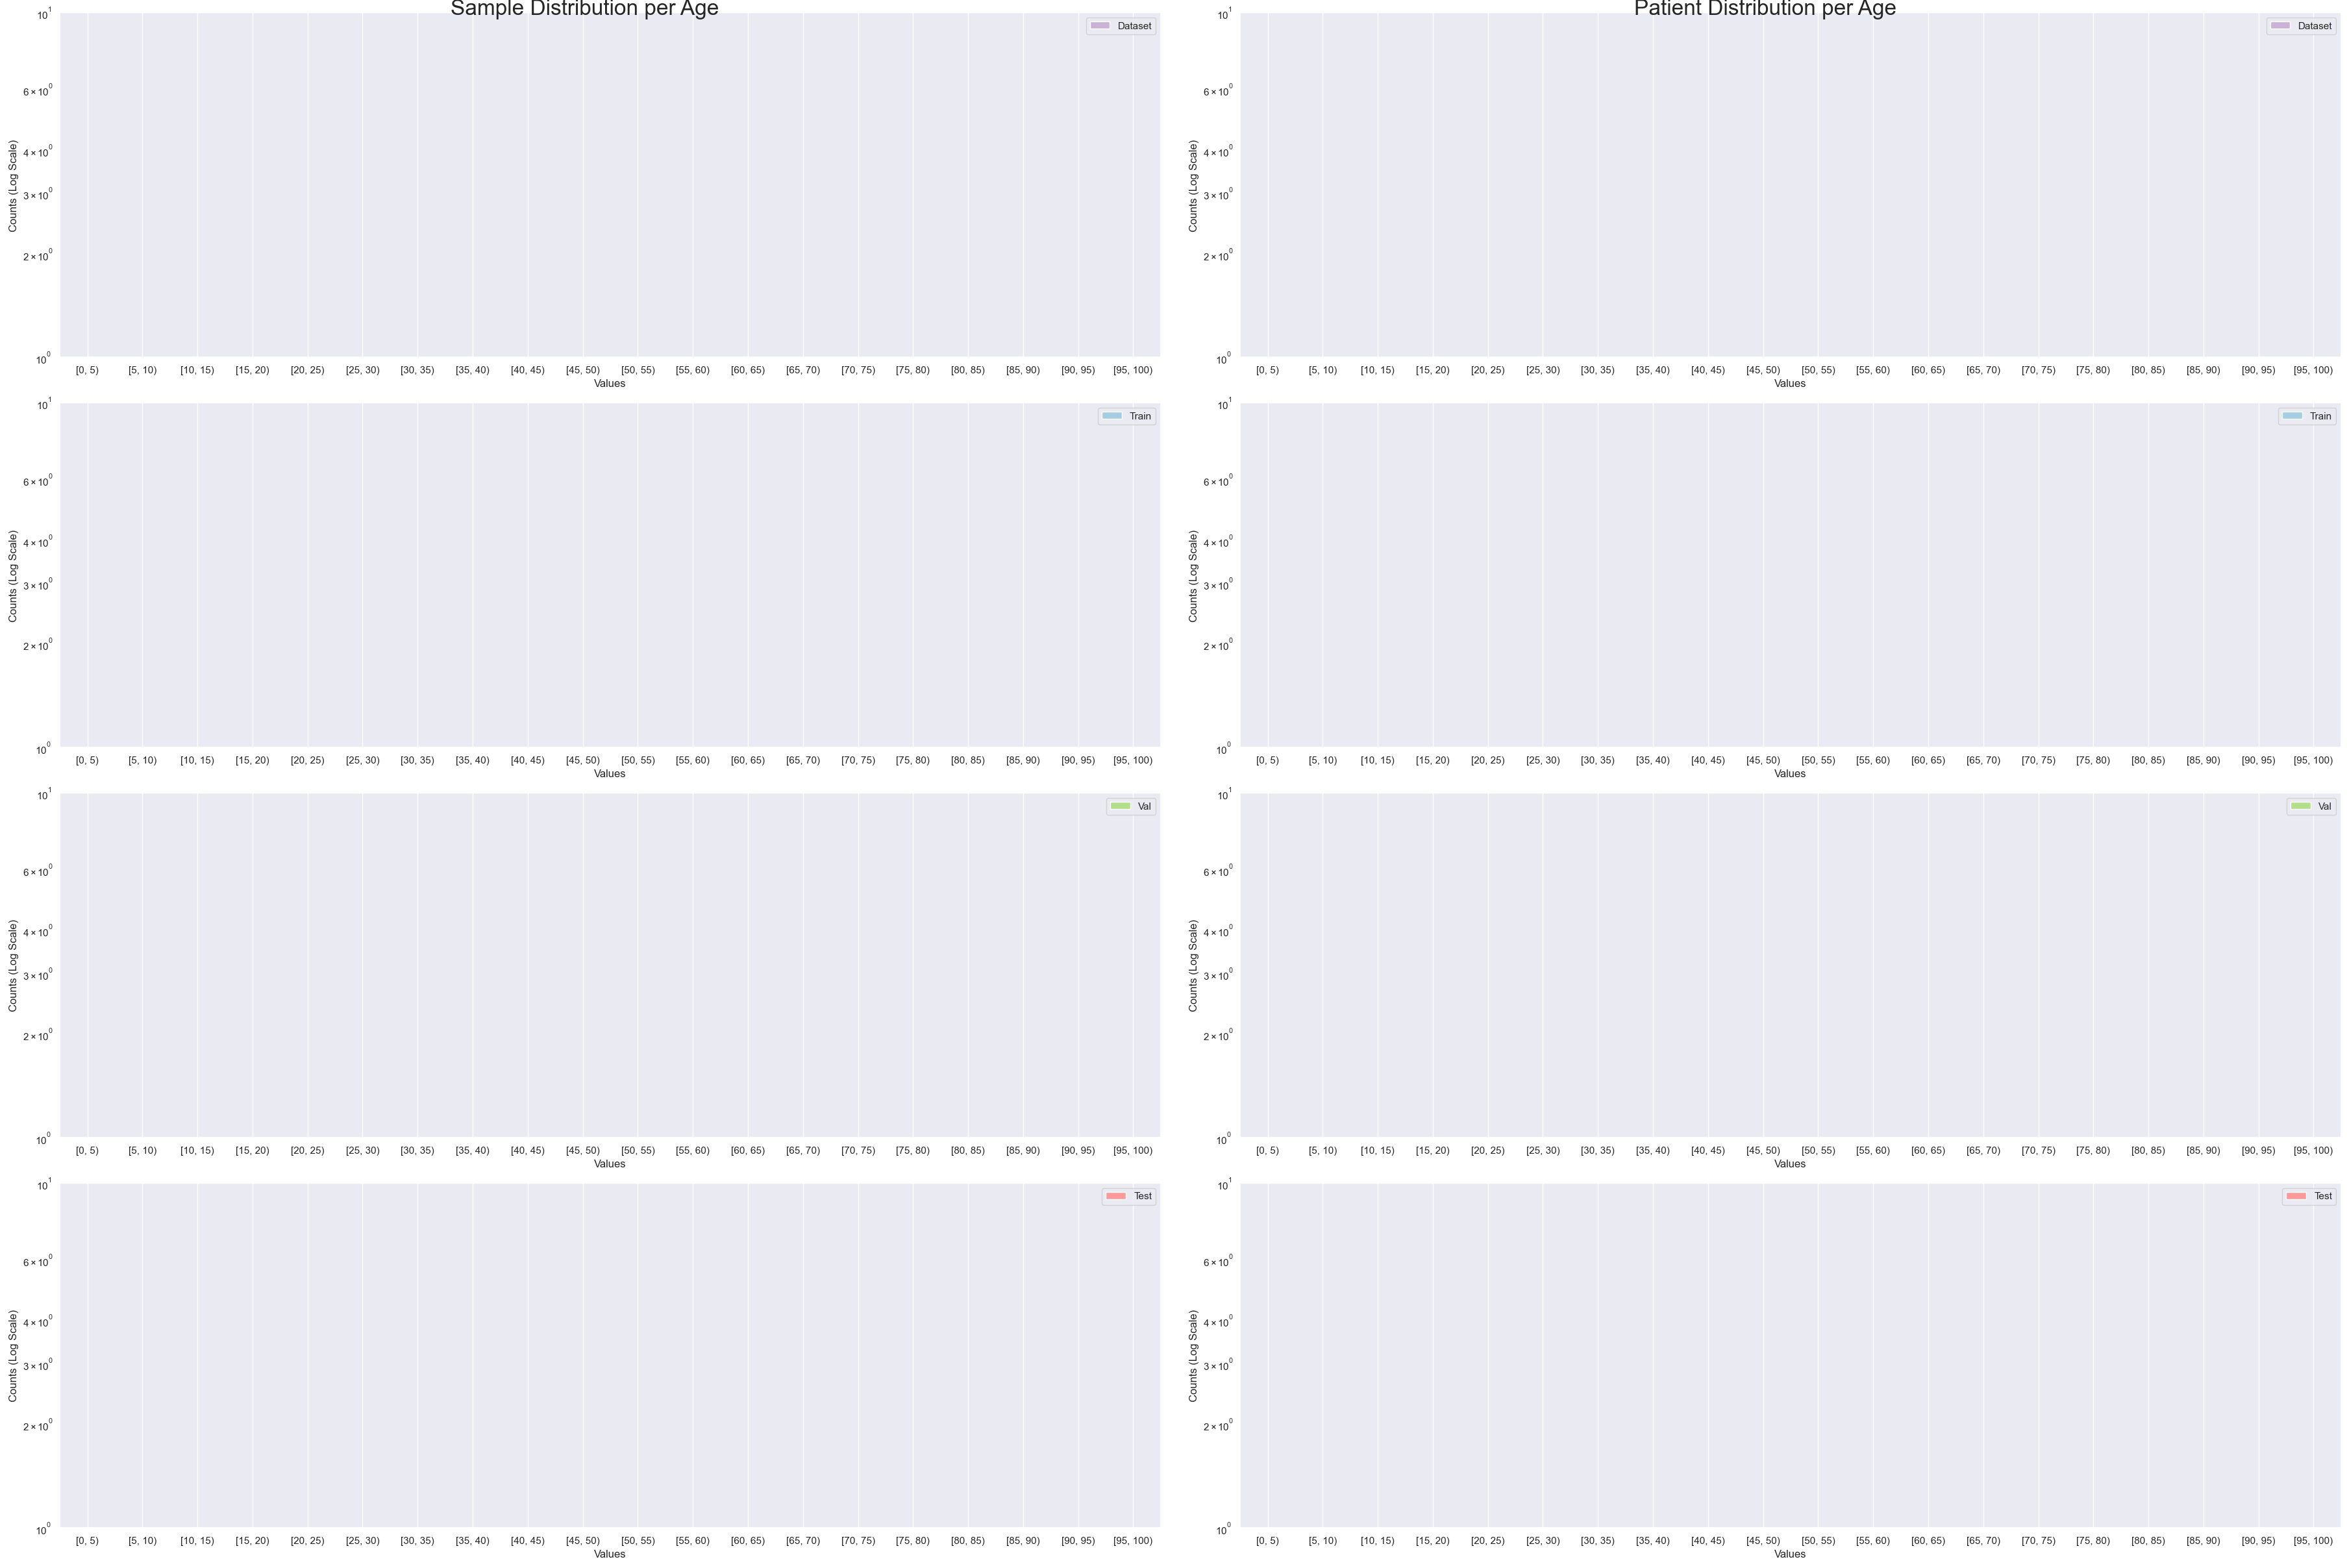

In [11]:
plot.column_as_histograms( samples_df, patient_df, "age", dataset_name, figsize = (36, 24))

In [12]:
plot.column_as_table( samples_df, patient_df, "age", dataset_name, bin_flag = True )

,Dataset,Train,Val,Test
Values,,,,
"[0, 5)",0,0,0,0
"[5, 10)",0,0,0,0
"[10, 15)",0,0,0,0
"[15, 20)",0,0,0,0
"[20, 25)",0,0,0,0
"[25, 30)",0,0,0,0
"[30, 35)",0,0,0,0
"[35, 40)",0,0,0,0
"[40, 45)",0,0,0,0


## Sex

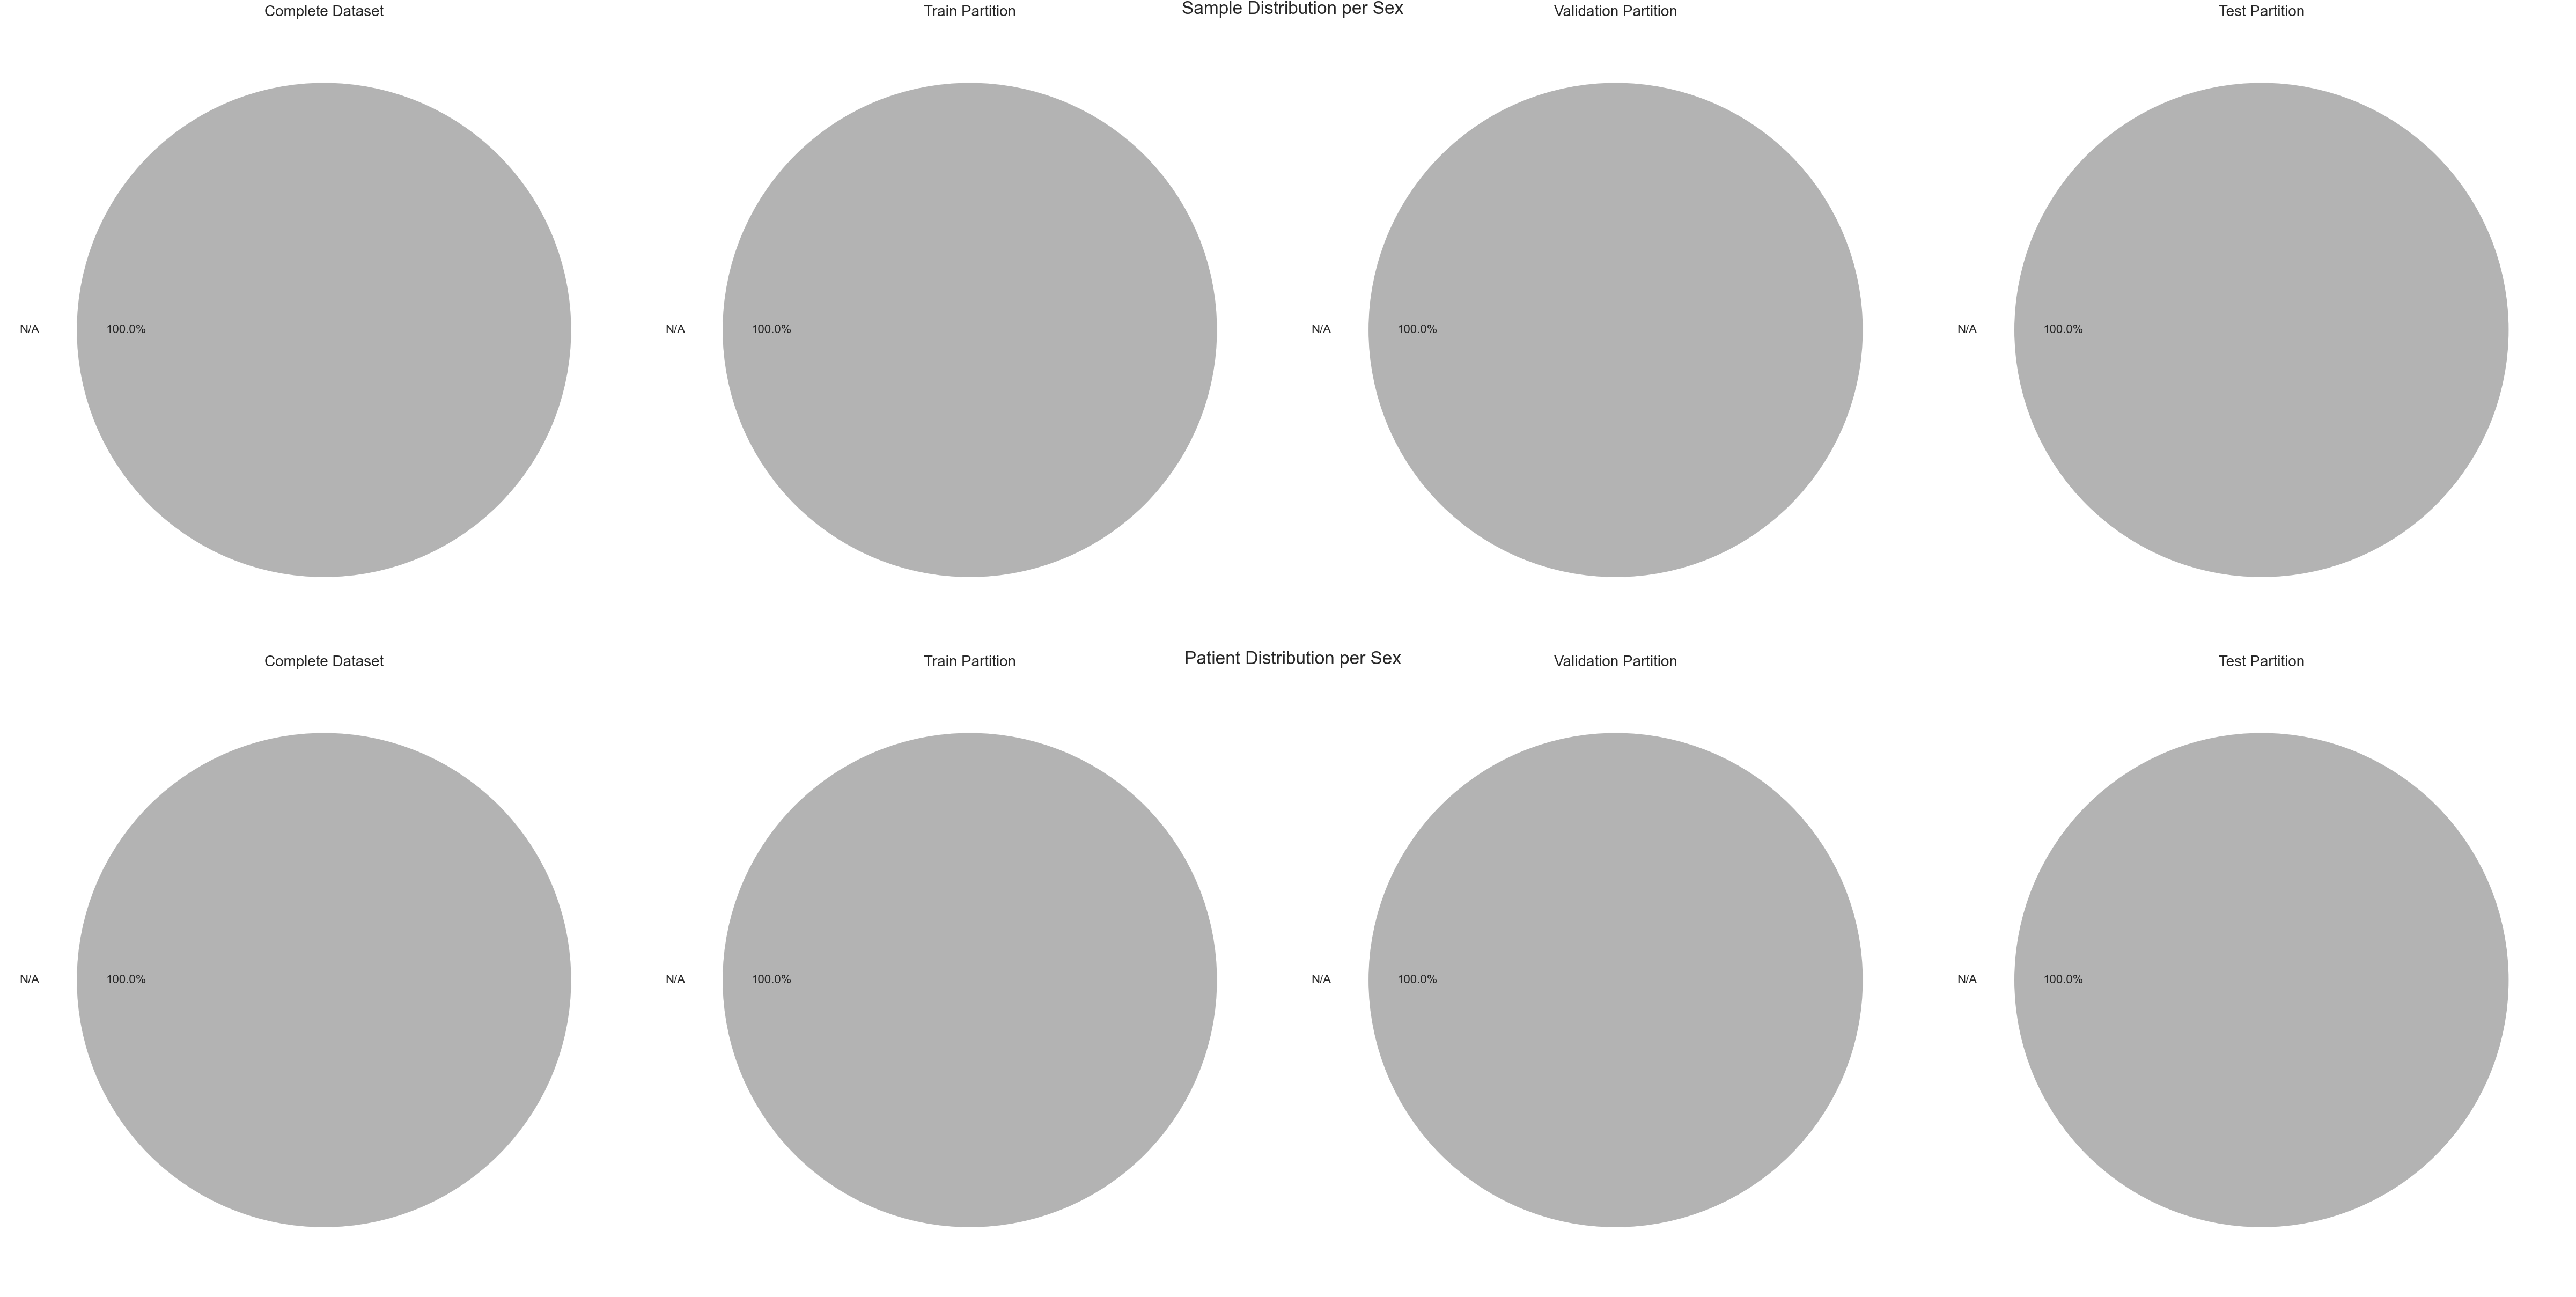

In [13]:
plot.column_as_pies( samples_df, patient_df, "sex", dataset_name, figsize = (48, 24) )

In [14]:
plot.column_as_table( samples_df, patient_df, "sex", dataset_name, bin_flag = False )

,Dataset,Train,Val,Test
Values,,,,
M,0,0,0,0
N/A,3999,2380,778,841
F,0,0,0,0
SUM,3999,2380,778,841
,Dataset,Train,Val,Test
Values,,,,
N/A,39,22,9,8
M,0,0,0,0
F,0,0,0,0


## Country

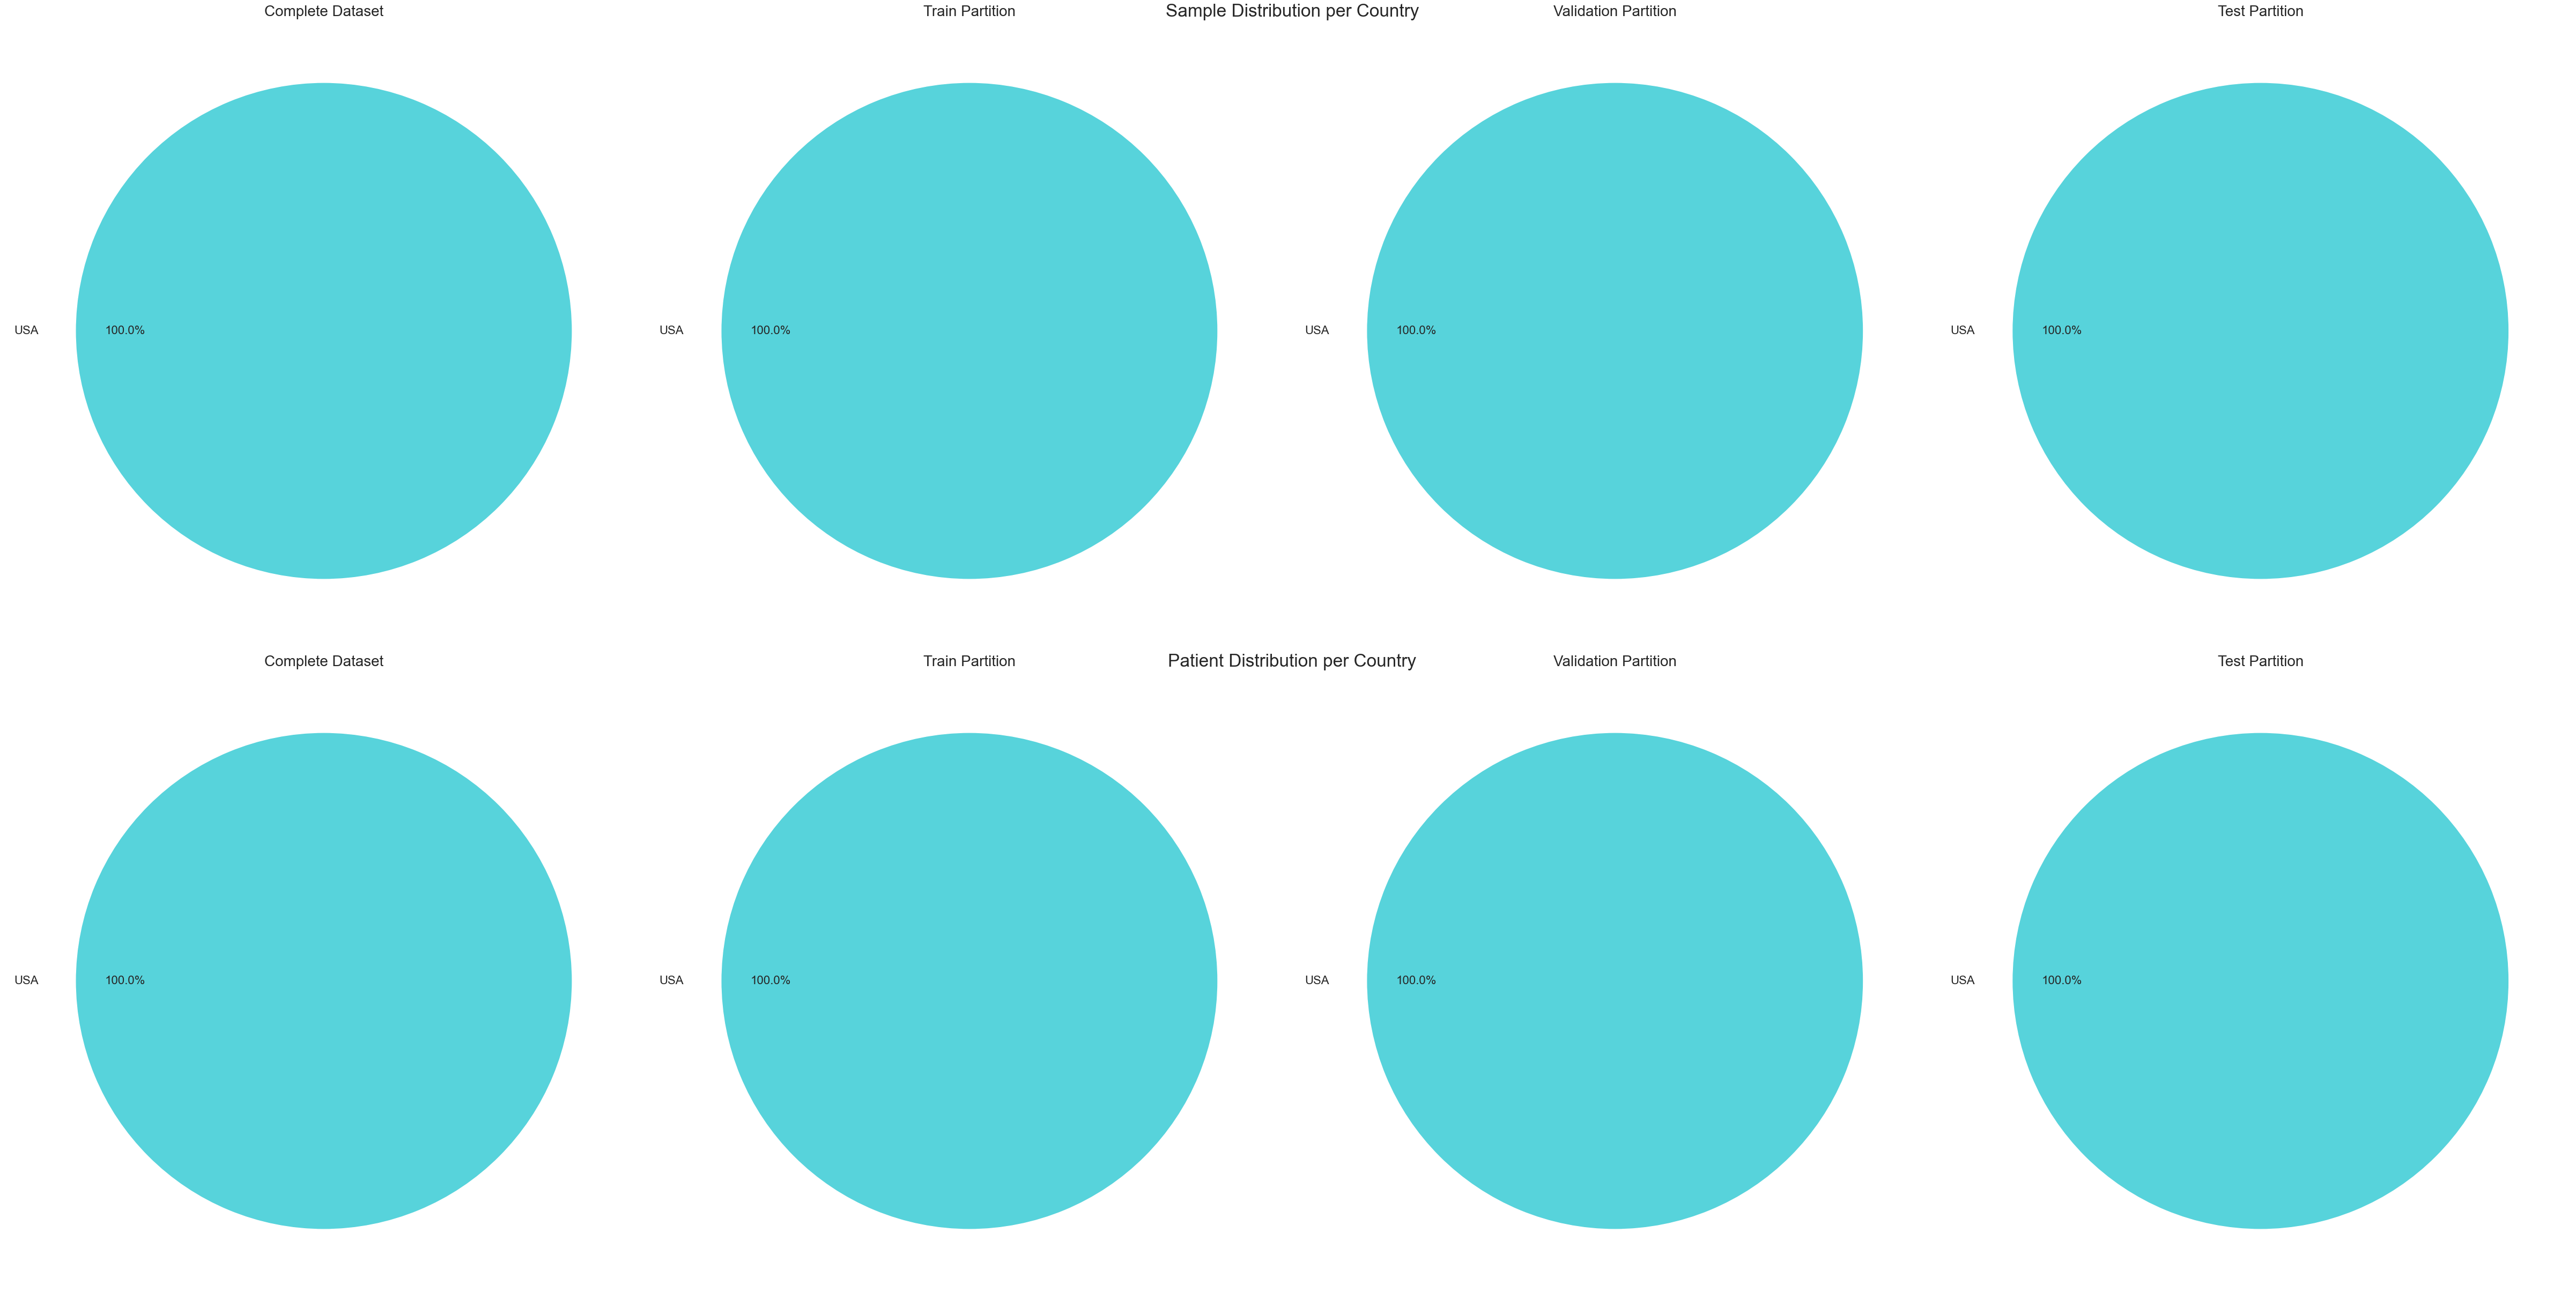

In [15]:
plot.column_as_pies( samples_df, patient_df, "country", dataset_name, figsize = (48, 24) )

In [16]:
plot.column_as_table( samples_df, patient_df, "country", dataset_name, bin_flag = False )

,Dataset,Train,Val,Test
Values,,,,
France,0,0,0,0
China,0,0,0,0
Iran,0,0,0,0
USA,3999,2380,778,841
N/A,0,0,0,0
Australia,0,0,0,0
Italy,0,0,0,0
Algeria,0,0,0,0
Belgium,0,0,0,0


## Partition

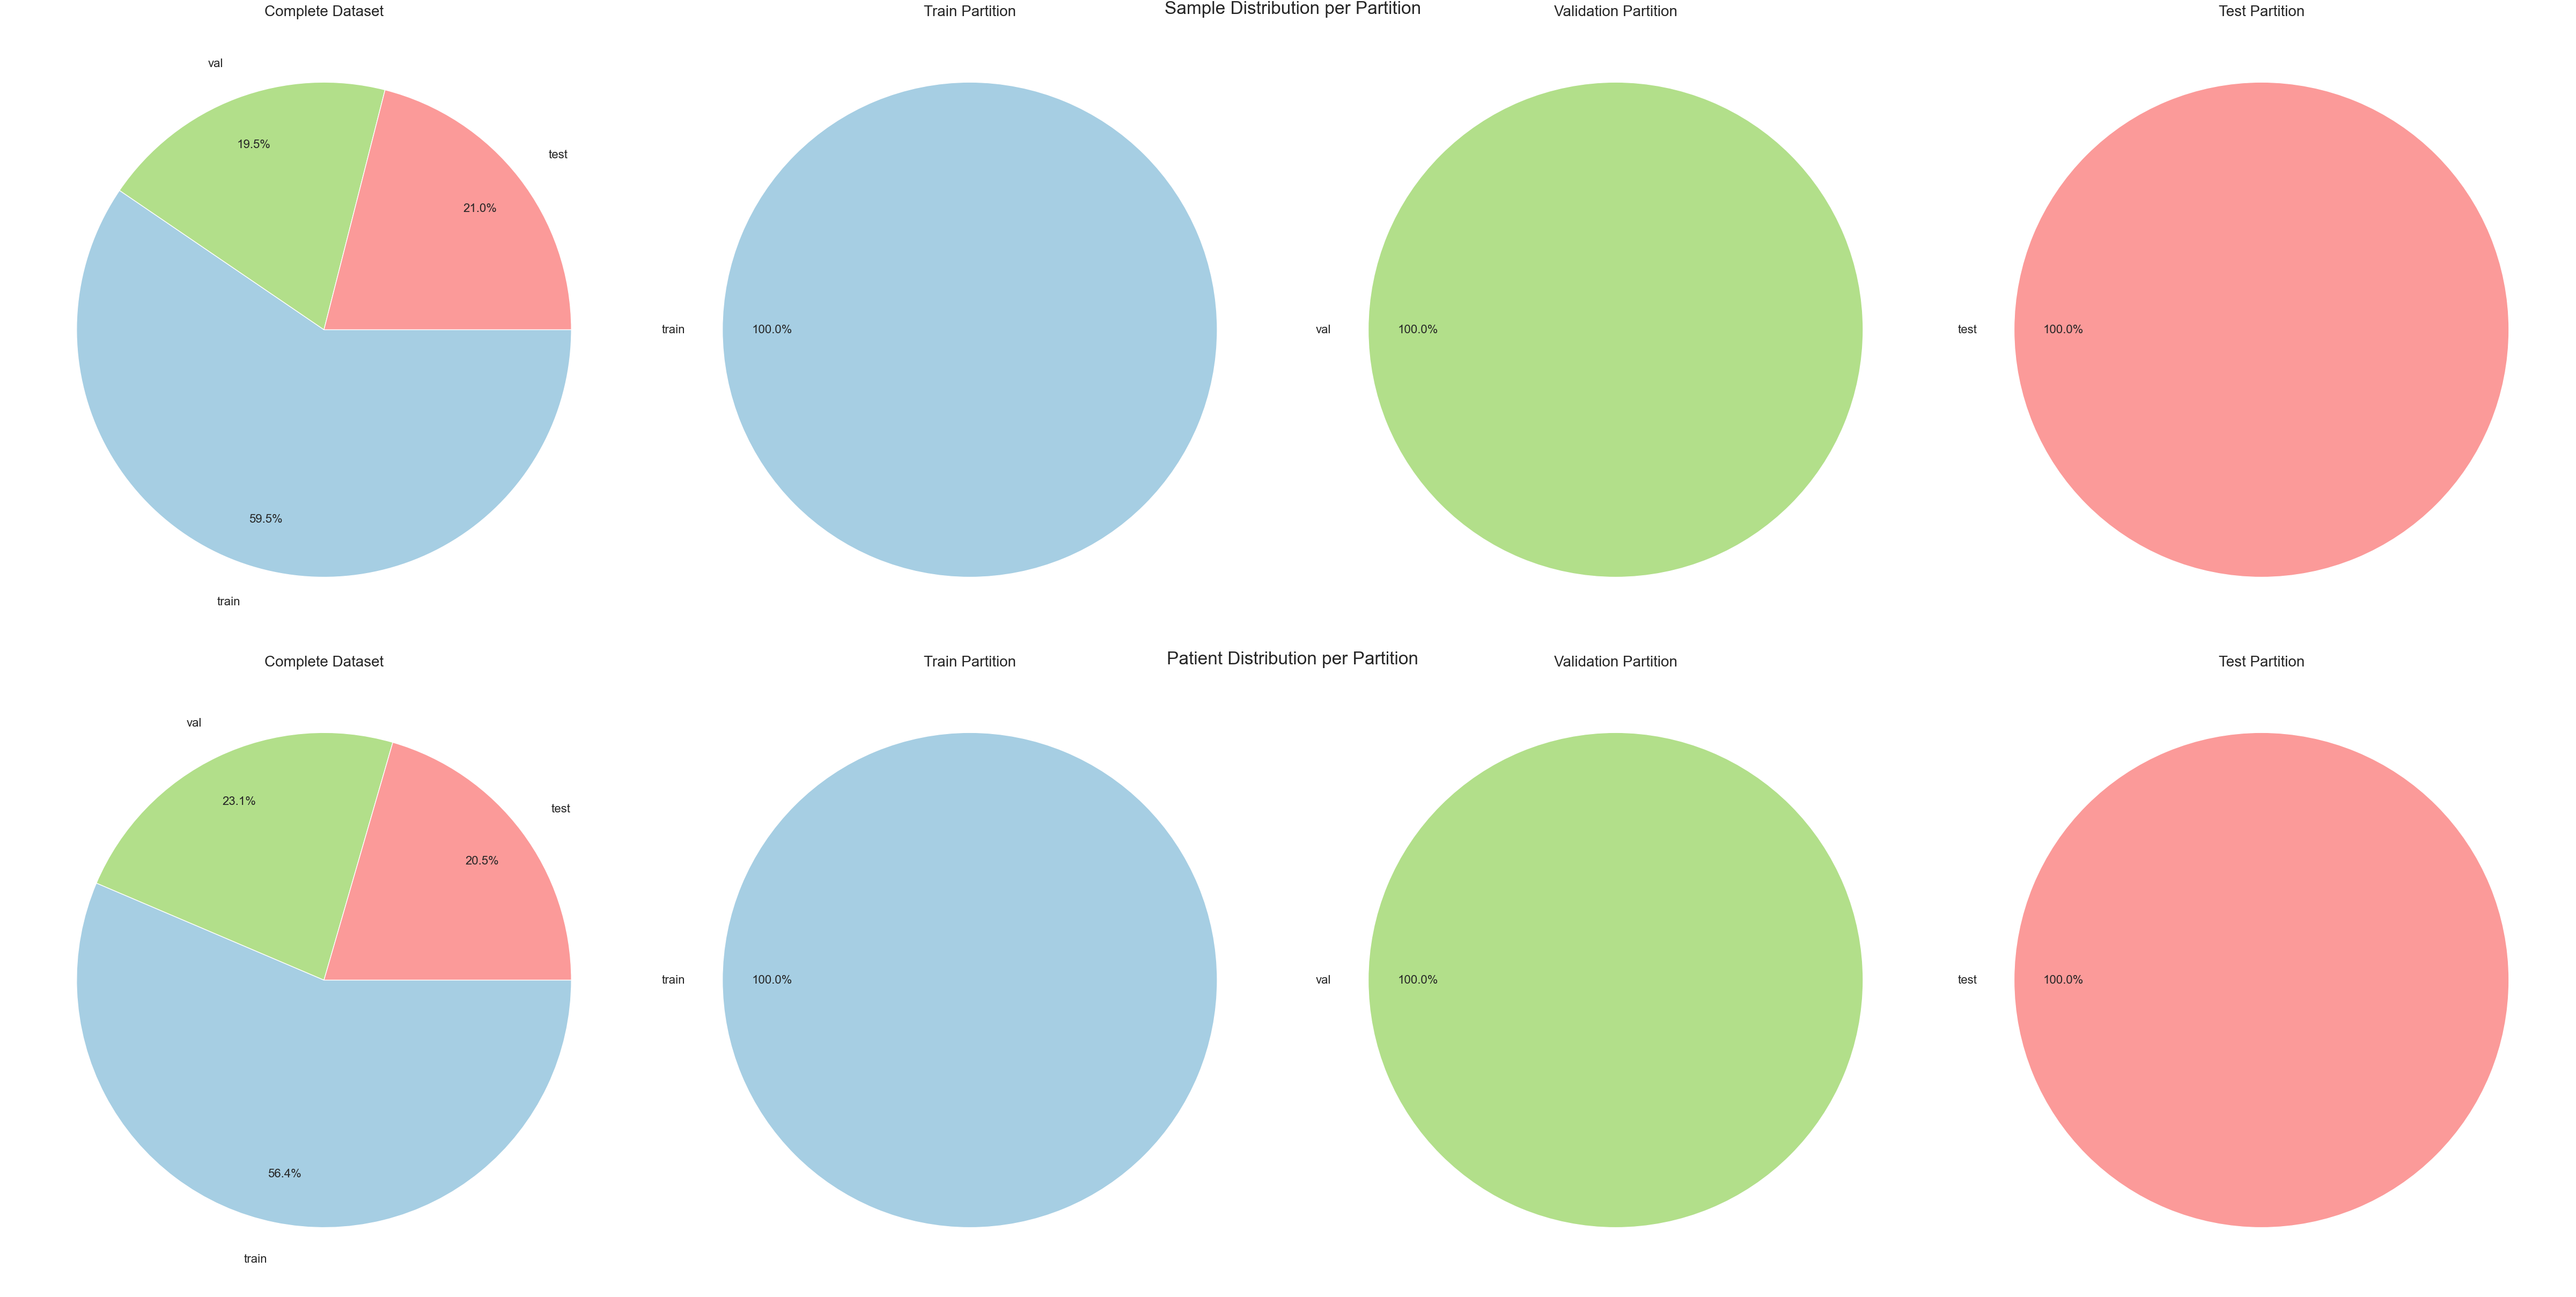

In [17]:
plot.column_as_pies( samples_df, patient_df, "partition", dataset_name, figsize = (48, 24) )

In [18]:
plot.column_as_table( samples_df, patient_df, "partition", dataset_name, bin_flag = False )

,Dataset,Train,Val,Test
Values,,,,
train,2380,2380,0,0
test,841,0,0,841
val,778,0,778,0
SUM,3999,2380,778,841
,Dataset,Train,Val,Test
Values,,,,
train,22,22,0,0
val,9,0,9,0
test,8,0,0,8


## Slice Selection

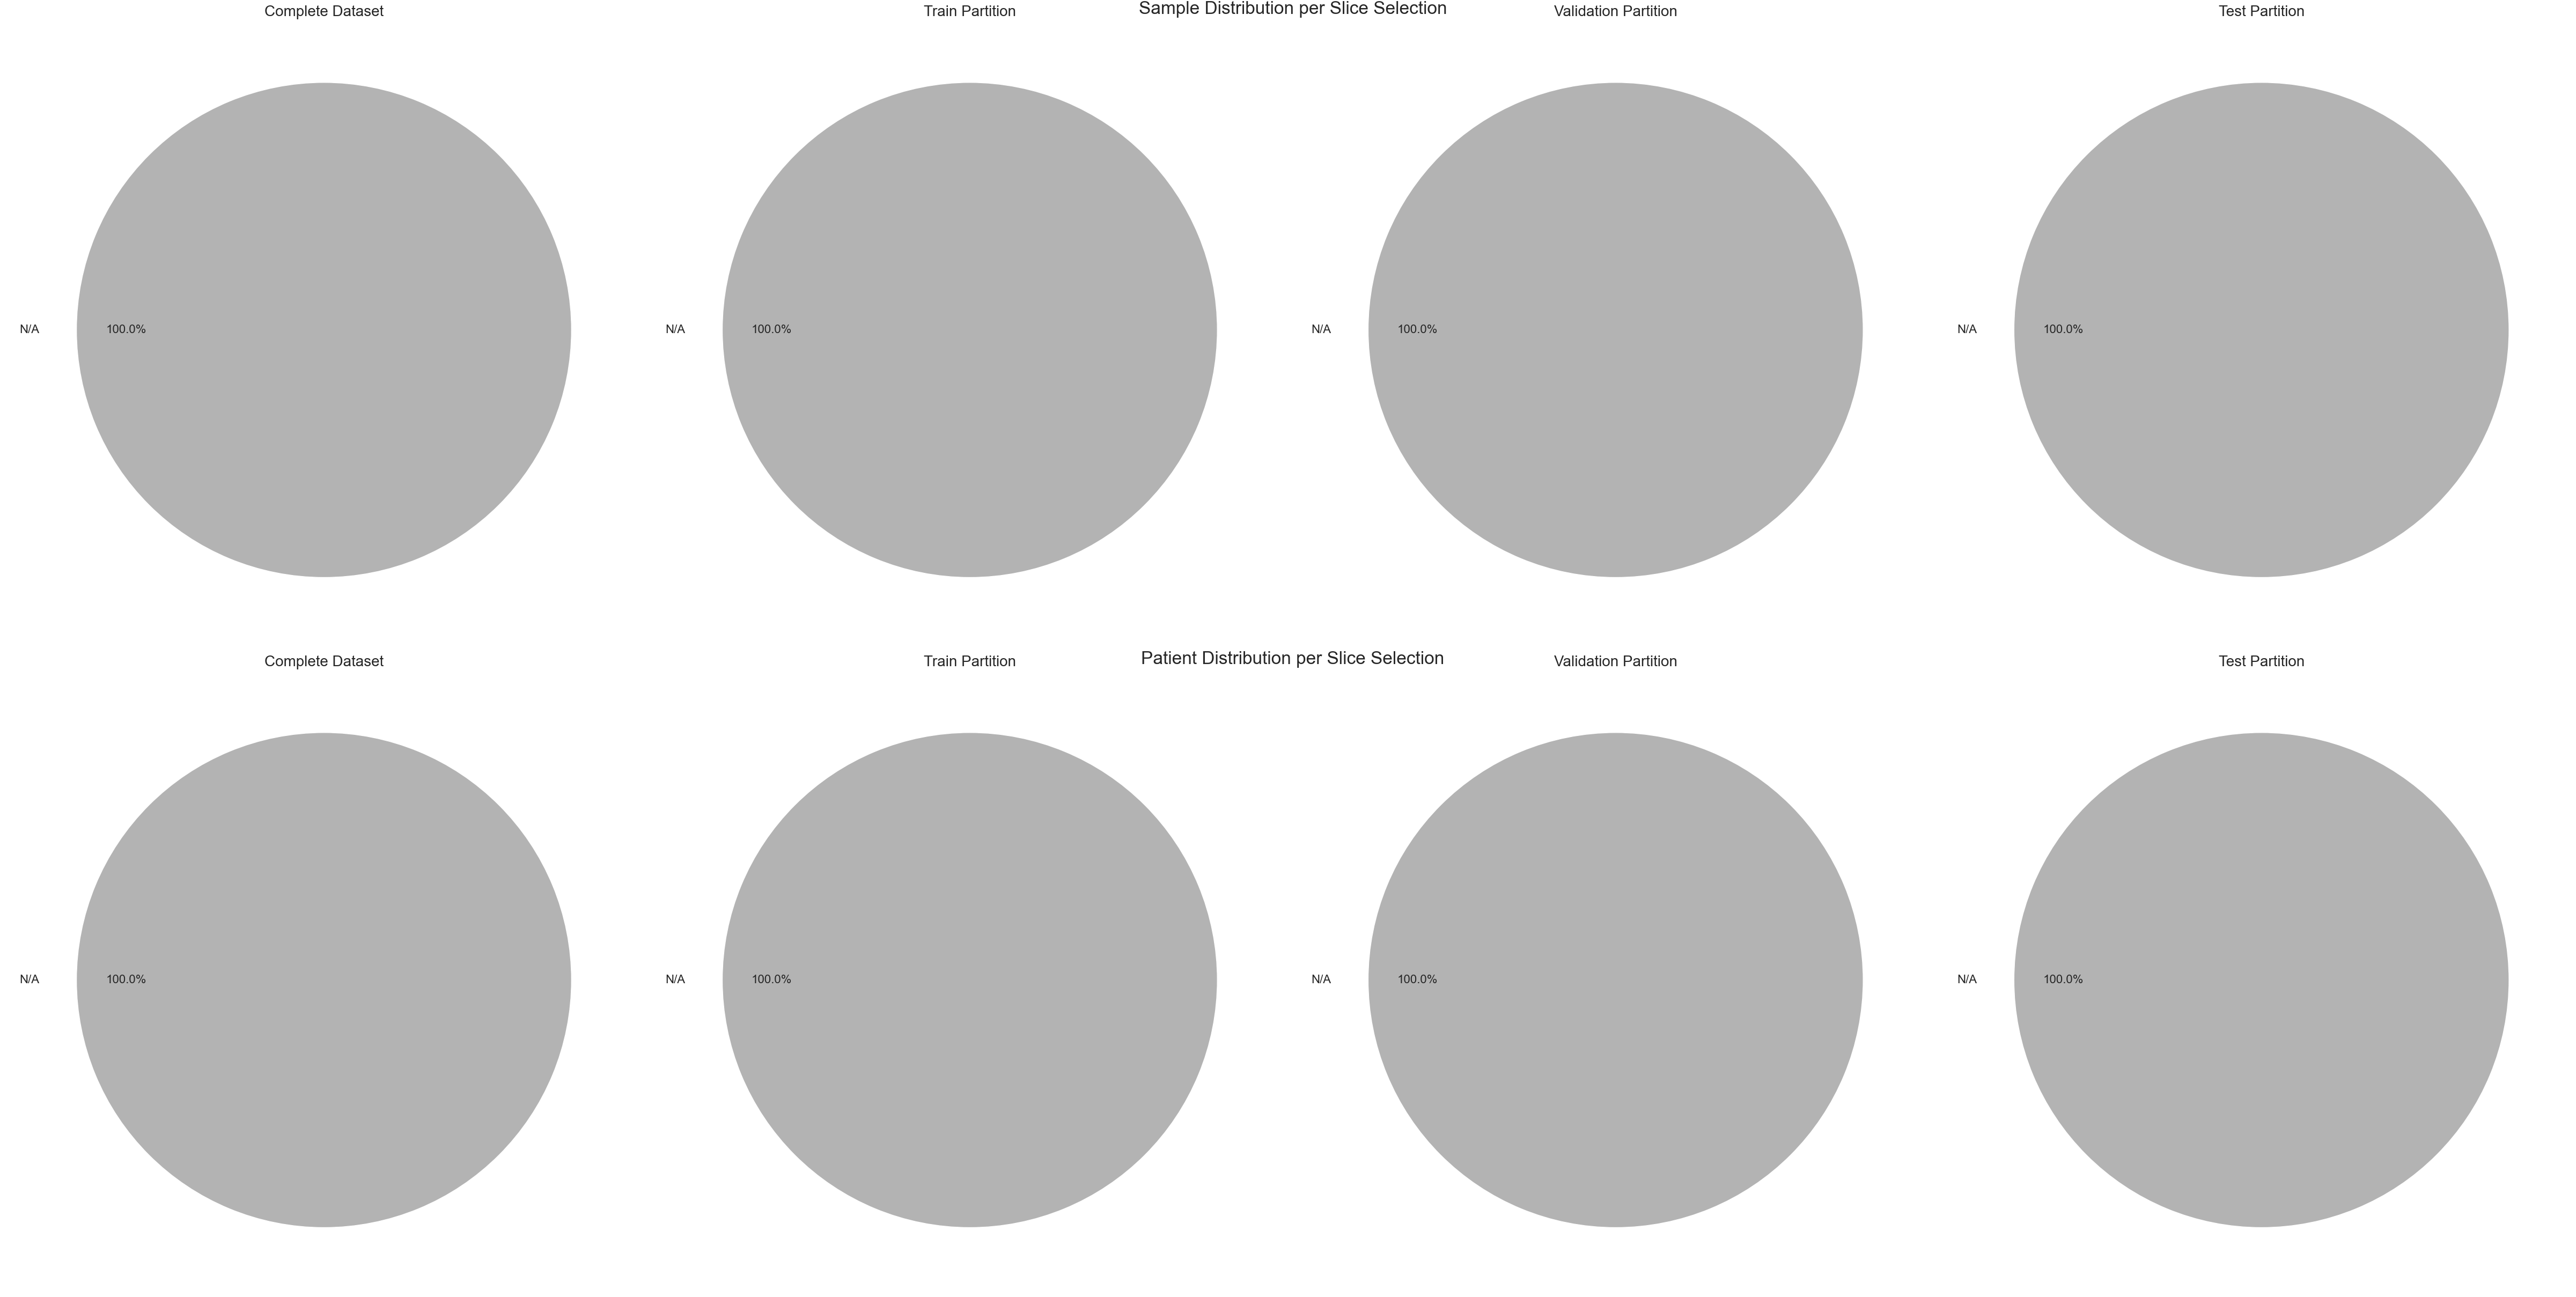

In [19]:
plot.column_as_pies( samples_df, patient_df, "slice_selection", dataset_name, figsize = (48, 24) )

In [20]:
plot.column_as_table( samples_df, patient_df, "slice_selection", dataset_name, bin_flag = False )

,Dataset,Train,Val,Test
Values,,,,
Automatic,0,0,0,0
Expert,0,0,0,0
N/A,3999,2380,778,841
Non-expert,0,0,0,0
SUM,3999,2380,778,841
,Dataset,Train,Val,Test
Values,,,,
Automatic,0,0,0,0
Expert,0,0,0,0


# Data Split

In [21]:
# No Split was needed

# Registering Changes

In [22]:
# Path to save new metadata csv
csv_export_path = os.path.join( data_dir, "new_split_metadata.csv" )

updated_df = split.update_metadata_csv( csv_export_path, samples_df, dataset_name, save_bool = True )
print( len(updated_df), len(samples_df[ samples_df["source"] == dataset_name ]) )
updated_df.head()

194922 3999


,filename,patient_id,source,class,country,sex,age,partition,slice_selection,x_min,y_min,x_max,y_max,verified_finding,view,modality
0,NCP_96_1328_0032.png,NCP_96,CNCB,COVID-19,China,M,74.0,train,Expert,9,94,512,405,Yes,Axial,CT
1,NCP_96_1328_0035.png,NCP_96,CNCB,COVID-19,China,M,74.0,train,Expert,10,106,512,405,Yes,Axial,CT
2,NCP_96_1328_0036.png,NCP_96,CNCB,COVID-19,China,M,74.0,train,Expert,10,105,512,406,Yes,Axial,CT
3,NCP_96_1328_0037.png,NCP_96,CNCB,COVID-19,China,M,74.0,train,Expert,11,104,512,406,Yes,Axial,CT
4,NCP_96_1328_0038.png,NCP_96,CNCB,COVID-19,China,M,74.0,train,Expert,11,103,512,406,Yes,Axial,CT
